In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
fema_claims_xl = pd.ExcelFile("Data\Yearly Paid Claims_FEMA.xlsx")
fema_funding_xl = pd.ExcelFile("Data\Yearly FEMA funding.xlsx")
disasterinci = pd.ExcelFile("Data/FEMA_Disaster incidents.xlsx")
precip_df = pd.read_csv("Data/heavy_precip.csv")
temp_data = pd.read_csv("Temperature Anomolies/Resources/Temperature_fig-1.csv")
disasterdec = pd.ExcelFile("Data/FEMA_Disaster Declarations.xlsx")

In [3]:
#The total number of claims closed with payment for the given year.
#The total dollar amount paid (in billions) on closed claims for the given year.
nfip_pd = fema_claims_xl.parse("NFIP")
nfip_df = nfip_pd.groupby(["Year"]).sum()
nfip_df.reset_index(level=0, inplace=True)
#nfip = nfip_df[(nfip_df["Year"] >= 1996) & (nfip_df["Year"] <= 2015)]
nfip = nfip_df.rename(columns = {'NumberOfClaimsClosedWithPayment':'Number of Claims Closed'})
nfip = nfip.rename(columns = {'TotalPaid':'Total Paid on Closed Claims'})
nfip['Year'] = nfip['Year'].astype(int)
nfip['Total Paid on Closed Claims'] = nfip['Total Paid on Closed Claims']/1000000000
nfip.head()

,Year,Number of Claims Closed,Total Paid on Closed Claims
0,1996,46849.0,0.635417
1,1997,27063.0,0.414132
2,1998,52074.0,0.706868
3,1999,43385.0,0.563194
4,2000,14718.0,0.180638


In [4]:
#The number of Flooding Episdoes for the Year.
noaa_df = fema_claims_xl.parse("NOAA")
noaa_pd = noaa_df.groupby(["Year"]).sum()
noaa_pd.pop("Lat")
noaa_pd.pop("Lon")
noaa = noaa_pd.rename(columns = {'NumEpisodes':'Flooding Episodes'})
noaa.reset_index(level=0, inplace=True)
noaa['Year'] = noaa['Year'].astype(int)
noaa.head()

,Year,Flooding Episodes
0,1996,5633
1,1997,4658
2,1998,5461
3,1999,3873
4,2000,3536


In [5]:
#FEMA Funding in billions of Real 2010 Dollars
fema_funding = fema_funding_xl.parse("Data Source-CRS Report")
fema_funding.head()

,Year,Administration Request,Enacted Appropriation,Emergency Supplemental,Total Enacted
0,2000,3.521,3.521,0.000,3.521
1,2001,3.584,1.964,0.000,1.964
2,2002,1.660,0.805,0.000,0.805
3,2003,2.185,0.948,1.690,2.638
4,2004,2.258,2.078,2.555,4.633


In [6]:
#Extreme One-Day Precipitation Events:  
#percentage of the land area of the contiguous 48 states where a much greater than normal portion 
#of total annual precipitation has come from extreme single-day precipitation events.
precip = precip_df[(precip_df['Year'] >= 1996) & (precip_df['Year'] <= 2015)]
precip.pop("9-year moving average")
precip.head()

,Year,Index value
86,1996,0.203
87,1997,0.112
88,1998,0.206
89,1999,0.153
90,2000,0.092


In [7]:
#Number of disaster incidents by year
d_incidents = disasterinci.parse("FEMA Declarations")
dis_inci = d_incidents[["Year", "Incident Type"]]
incidents_count = dis_inci.groupby(["Year"]).count()
incidents_count.reset_index(level=0, inplace=True)
incidents_count = incidents_count.rename(columns = {"Incident Type":'Number of Disasters Incidents'})
incidents_count.head()

,Year,Number of Disasters Incidents
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


In [8]:
#Temperature data: annual average temperatures in the contiguous 48 states have changed since 1901
bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decades = [1900,1910,1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
temp_data["Decade"] = pd.cut(temp_data["Year"], bins, labels=decades)
temp_data = temp_data[["Year", "Earth's surface"]]
temp_data = temp_data.rename(columns = {"Earth's surface":'Temperature anomaly'})
temp_data.head()

,Year,Temperature anomaly
0,1901,-0.15
1,1902,-0.43
2,1903,-1.40
3,1904,-0.86
4,1905,-1.02


In [9]:
#Number of disaster declarations per year
fema_declarations = disasterdec.parse("FEMA Declarations")
fema_declarations['year'] = fema_declarations['Declaration Date'].dt.year
declartion_year = fema_declarations.groupby(["year"]).count()
declartion_year.reset_index(level=0, inplace=True)
disaster_declaration = declartion_year[["year", "Incident Type"]]
disaster_declaration = disaster_declaration.rename(columns = {"Incident Type":'Number of Disaster Declarations'})
disaster_declaration.head()

,year,Number of Disaster Declarations
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


In [10]:
incident_types = fema_declarations["Incident Type"].value_counts()
incident_types

Severe Storm(s)     15963
Hurricane            9727
Flood                9496
Snow                 3620
Fire                 2656
Severe Ice Storm     1990
Tornado              1430
Drought              1292
Coastal Storm         462
Freezing              301
Other                 297
Typhoon               119
Earthquake            105
Volcano                50
Fishing Losses         42
Mud/Landslide          10
Toxic Substances        9
Chemical                9
Tsunami                 9
Dam/Levee Break         6
Human Cause             6
Terrorist               5
Name: Incident Type, dtype: int64

In [11]:
incident_types = pd.DataFrame(incident_types)
incident_types = incident_types.rename(columns = {"" : "Disaster Type", "Incident Type": "Number of Disasters"})
incident_types.head()

,Number of Disasters
Severe Storm(s),15963
Hurricane,9727
Flood,9496
Snow,3620
Fire,2656


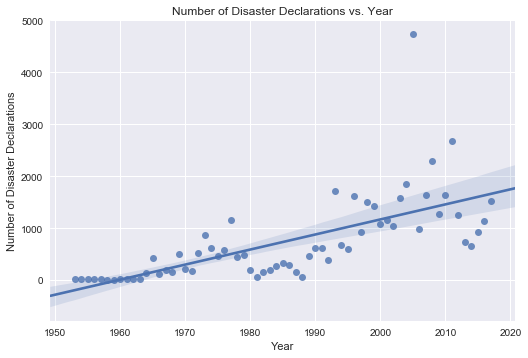

In [12]:
#Number of Total Disasters Declarations (sum of all disasters) VS year 
#FEMA disaster declarations VS Year (two line graphs on top of each other)

sns.set()

# Create scatterplot of dataframe
sns.lmplot("year", "Number of Disaster Declarations", aspect = 1.5, data= disaster_declaration, fit_reg=True) 

# Set title and labels
plt.title('Number of Disaster Declarations vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Disaster Declarations')

#Save as png and show graph
DisasterDeclarations = plt.gcf()
plt.savefig('DisasterDeclarations.png')
plt.show()


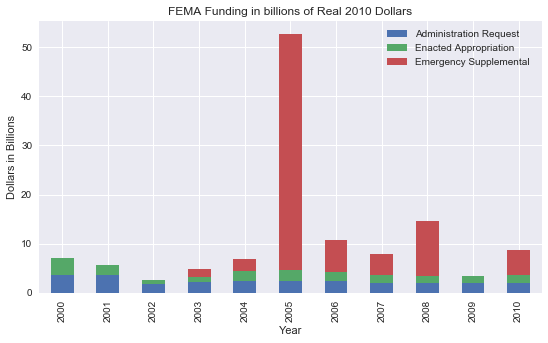

In [13]:
#FEMA budget VS Year | bar graph
plt.rcParams["figure.figsize"] = [9,5]
year_x = fema_funding['Year']
budget_g = fema_funding[['Administration Request', 'Enacted Appropriation', 'Emergency Supplemental ']].plot(x= year_x, kind='bar', stacked=True)
#budget_g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set title and labels
plt.title('FEMA Funding in billions of Real 2010 Dollars')
plt.xlabel('Year')
plt.ylabel('Dollars in Billions')

#Save as png and show graph
femafunding = plt.gcf()
plt.savefig('FEMAFunding.png')
plt.show()

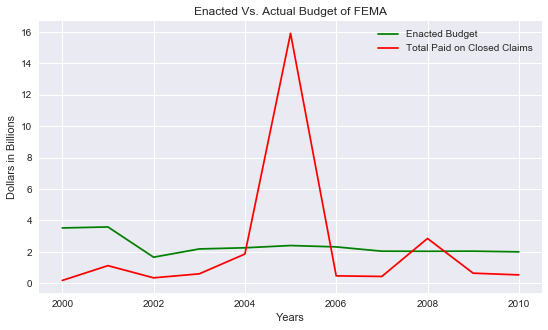

In [14]:
#Enacted appropriation + Administration request
femabudget = fema_funding['Administration Request'].tolist()

#Total paid on closed claims
paid_claims = nfip[(nfip_df["Year"] >= 2000) & (nfip["Year"] <= 2010)]
claims_budget = paid_claims['Total Paid on Closed Claims'].tolist()

#Enacted appropriation + Administration request AND Total paid on closed claims VS Year (2 line graph)
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, femabudget, color="green", label="Enacted Budget")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, claims_budget, color="red", label="Total Paid on Closed Claims")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Enacted Vs. Actual Budget of FEMA")
plt.xlabel("Years")
plt.ylabel("Dollars in Billions")

# Print and save chart to the screen
Comparebudget = plt.gcf()
plt.savefig('CompareBudgetofFema.png')
plt.show()


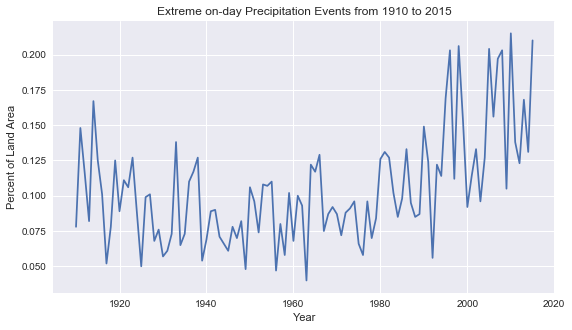

In [15]:
#Extreme one-day precipitation events from 1910 to 2015.

plt.plot(precip_df["Year"],precip_df["Index value"])
plt.title("Extreme on-day Precipitation Events from 1910 to 2015")
plt.xlabel("Year")
plt.ylabel("Percent of Land Area")
plt.savefig("Extreme on-day Precipitation Events from 1910 to 2015")
plt.show()

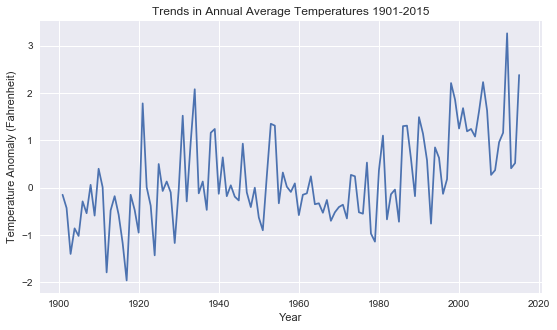

In [16]:
#Annual Average Temperatures 1901-2015
plt.plot(temp_data["Year"], temp_data["Temperature anomaly"])
plt.title("Trends in Annual Average Temperatures 1901-2015")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (Fahrenheit)")
plt.savefig("Trends in Annual Average Temperatures 1901-2015")
plt.show()

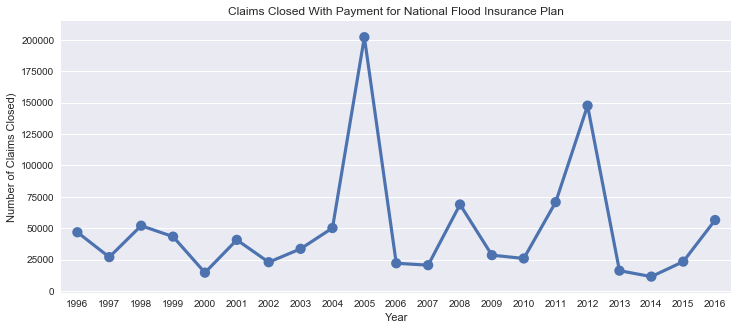

In [17]:
# NUmber of Claims closed for National flood insurance Plan VS Year | bar graph
plt.rcParams["figure.figsize"] = [12,5]
sns.pointplot("Year", "Number of Claims Closed", data = nfip, fit_reg=True)
plt.title("Claims Closed With Payment for National Flood Insurance Plan")
plt.xlabel("Year")
plt.ylabel("Number of Claims Closed)")
plt.savefig("Number of Claims Closed")
plt.show()

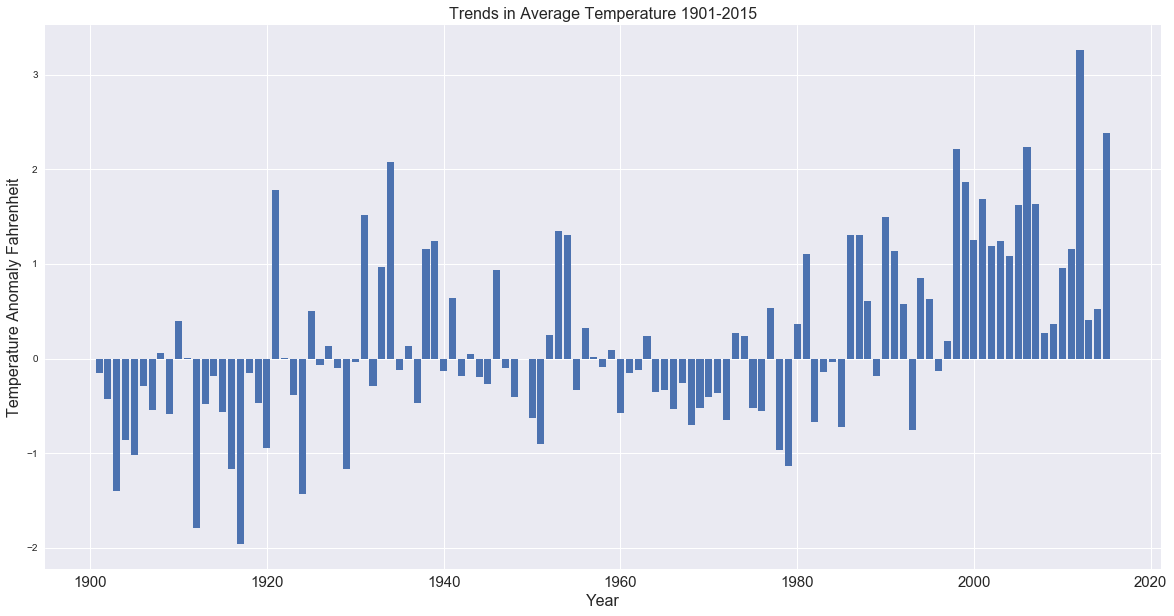

In [18]:
#Trend in Average temperatures from 1901-2015 bar graph.
plt.figure(figsize=(20,10))
plt.rc('axes', titlesize = 16)
plt.rc('axes', labelsize =16)
plt.rc('xtick', labelsize = 15)
plt.title("Trends in Average Temperature 1901-2015")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly Fahrenheit")
plt.bar(temp_data["Year"],temp_data["Temperature anomaly"])
plt.savefig("Trends in Average Temperature 1901-2015-Bar Graph ")
plt.show()

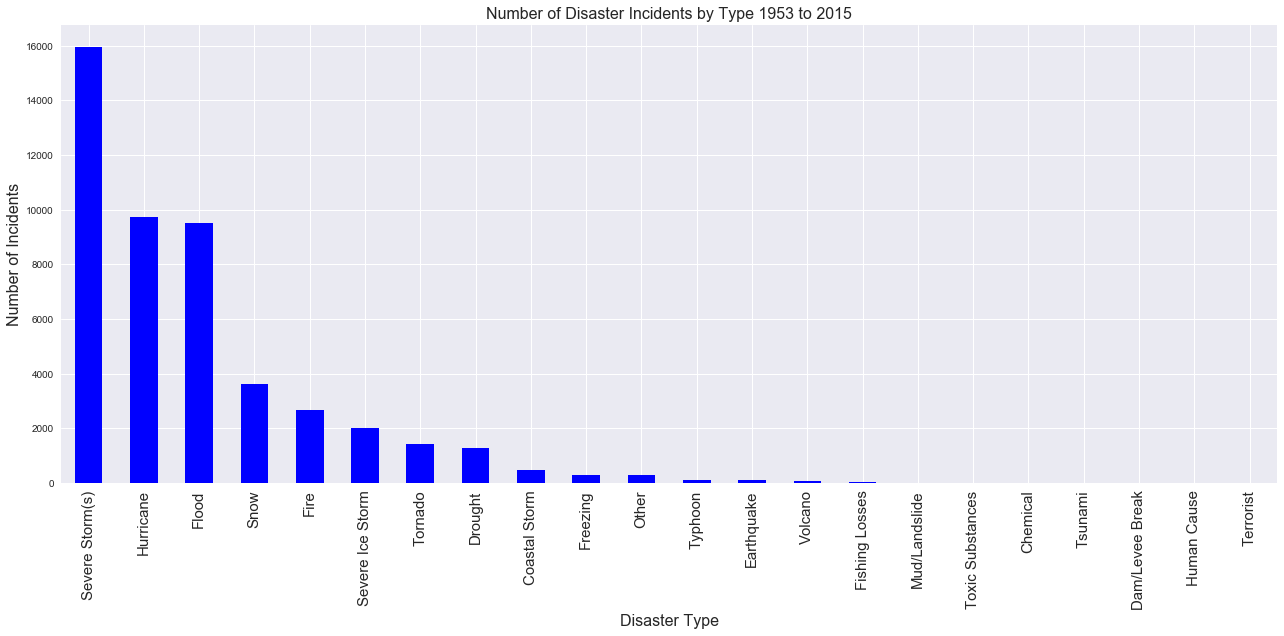

In [19]:
#Number of disasters type VS Disaster types (Bar Graph), 1953-2015.
incident_types.plot(kind="bar", facecolor="blue", figsize=(18,9), legend = False)
plt.rc('axes', titlesize = 16)
plt.rc('xtick', labelsize = 15)
plt.title("Number of Disaster Incidents by Type 1953 to 2015")
plt.xlabel("Disaster Type")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.savefig("FEMA Disaster Declarations 1953-2015")
plt.show()